In [2]:
!pip install essentia

     |████████████████████████████████| 12.0MB 234kB/s 


In [19]:
import os
import pandas as pd
from glob import glob
import numpy as np
from keras import layers
from keras import models
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
import keras.backend as K
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
import gc

import IPython.display as ipd
# % pylab inline
import os
import pandas as pd
import librosa
import glob 
import librosa.display
import random
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
 
from keras.utils.np_utils import to_categorical
 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 
 
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
 
from keras.callbacks import EarlyStopping
 
from keras import regularizers
 
from sklearn.preprocessing import LabelEncoder
 
import os
from glob import glob

from essentia.standard import * 


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/My Drive/Dataset/train/train.csv')
data[:10]

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark
5,6,children_playing
6,10,street_music
7,11,drilling
8,12,gun_shot
9,15,dog_bark


In [6]:
i = random.choice(data.ID)
ipd.Audio('/content/drive/My Drive/Dataset/train/Train/'+str(i)+'.wav')

In [7]:
filename= '/content/drive/My Drive/Dataset/train/Train/0.wav'

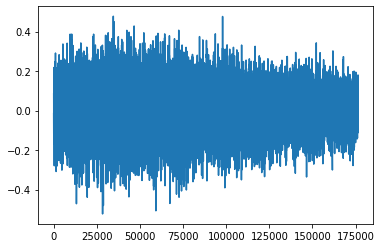

In [8]:
from pylab import plot, show, figure, imshow
audio = MonoLoader(filename = filename)()

plt.plot(audio)

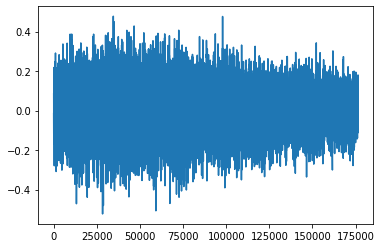

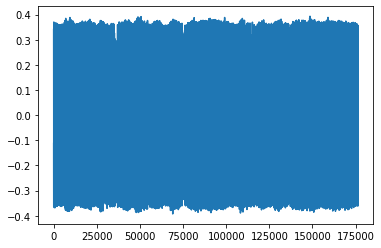

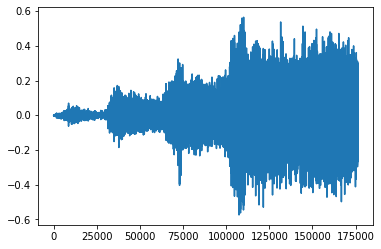

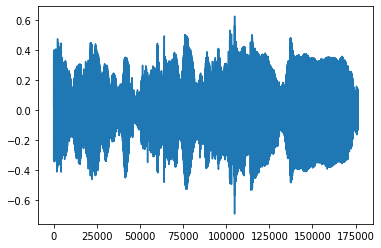

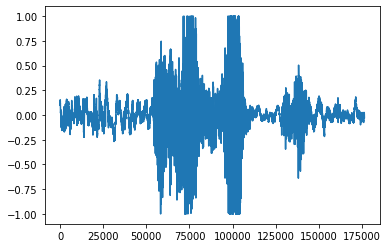

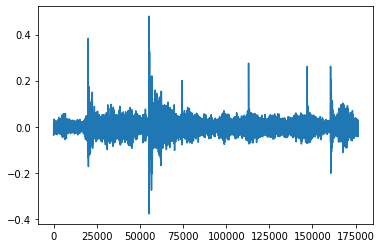

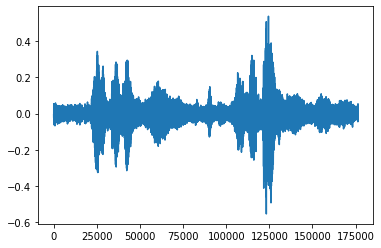

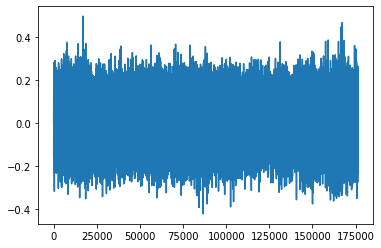

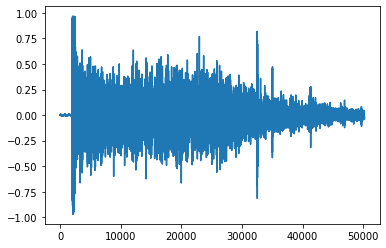

In [ ]:
for i in data.ID[:9]:
  filename = '/content/drive/My Drive/Dataset/train/Train/'+str(i)+'.wav'
  audio = MonoLoader(filename = filename)()

  plt.subplots()
  plt.plot(audio)
  

MFCC feature extraction :  (40, 345)




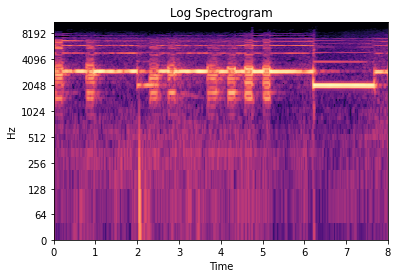

In [ ]:
fig,ax=plt.subplots()
X, sample_rate = librosa.load(filename, sr=None, res_type='kaiser_fast')
S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='log',x_axis='time',ax=ax)
mfccs = librosa.feature.mfcc(y=X ,sr=sample_rate,n_mfcc=40)
print('MFCC feature extraction : ',mfccs.shape)
print('\n')
ax.set(title='Log Spectrogram')
plt.show()


In [ ]:
def images(file):
    
    # We define the audiofile from the rows of the dataframe when we iterate through
    # every row of our dataframe for train, val and test
    audiofile = os.path.join(os.path.abspath('/content/drive/My Drive/Dataset/train/Train')+'/'+str(file.ID)+'.wav')
    
    # Loading the image with no sample rate to use the original sample rate and
    # kaiser_fast to make the speed faster according to a blog post about it (on references)
    X, sample_rate = librosa.load(audiofile, sr=None, res_type='kaiser_fast')
   
    # Setting the size of the image
    fig = plt.figure(figsize=[1,1])
    
    # This is to get rid of the axes and only get the picture 
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
      # This is the melspectrogram from the decibels with a linear relationship
    S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='log',x_axis='time')
    
    # Here we choose the path and the name to save the file, we will change the path when
    # using the function for train, val and test to make the function easy to use and output
    # the images in different folders to use later with a generator
    name = file.ID
    file  = '/content/drive/My Drive/Dataset/melspecs/' + str(name) + '.jpg'
    
    # Here we finally save the image file choosing the resolution 
    plt.savefig(file, dpi=500, bbox_inches='tight',pad_inches=0)
    
    # Here we close the image because otherwise we get a warning saying that the image stays
    # open and consumes memory
    plt.close()


In [9]:
train = data[:3435]
val = data[3435:4435]
test = data[4435:]

In [ ]:
train.apply(images, axis=1);

In [ ]:
test.apply(images, axis=1);

In [ ]:
val.apply(images, axis=1);

In [11]:
data = pd.read_csv('/content/drive/My Drive/Dataset/train/train.csv',dtype=str)

In [12]:
data.head()

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark


In [13]:
train = data[:3435]
val = data[3435:4435]
test = data[4435:]

In [14]:
def make_jpg(files):
    return str(files)+'.jpg'

In [15]:
train['ID'] = train["ID"].apply(make_jpg)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
val['ID'] = val["ID"].apply(make_jpg)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
test['ID'] = test["ID"].apply(make_jpg)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
datagen=ImageDataGenerator(rescale=1./255.)

In [24]:
train_generator=datagen.flow_from_dataframe(
    dataframe=train,
    directory="/content/drive/My Drive/Dataset/melspecs",
    x_col="ID",
    y_col="Class",
    batch_size=32,
    shuffle=False,
    class_mode="categorical",
    target_size=(64,64))

Found 3435 validated image filenames belonging to 10 classes.


In [25]:
val_generator=datagen.flow_from_dataframe(
    dataframe=val,
    directory="/content/drive/My Drive/Dataset/melspecs",
    x_col="ID",
    y_col="Class",
    batch_size=32,
    shuffle=False,
    class_mode="categorical",
    target_size=(64,64))

Found 1000 validated image filenames belonging to 10 classes.


In [26]:
test_generator=datagen.flow_from_dataframe(
    dataframe=test,
    directory="/content/drive/My Drive/Dataset/melspecs",
    x_col="ID",
    y_col="Class",
    batch_size=32,
    shuffle=False,
    class_mode="categorical",
    target_size=(64,64))

Found 1000 validated image filenames belonging to 10 classes.


In [27]:
plt.close('all')

In [28]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [29]:
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [30]:
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=108,
                    validation_data=val_generator,
                    validation_steps=32,
                    epochs=250)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/250
108/108 [==============================] - 894s 8s/step - loss: 2.2884 - accuracy: 0.1280 - val_loss: 2.1391 - val_accuracy: 0.2290
Epoch 2/250
108/108 [==============================] - 16s 149ms/step - loss: 2.0769 - accuracy: 0.2326 - val_loss: 1.9643 - val_accuracy: 0.2780
Epoch 3/250
108/108 [==============================] - 16s 148ms/step - loss: 2.0116 - accuracy: 0.2491 - val_loss: 1.9274 - val_accuracy: 0.2980
Epoch 4/250
108/108 [==============================] - 16s 148ms/step - loss: 1.8833 - accuracy: 0.2990 - val_loss: 1.7695 - val_accuracy: 0.3630
Epoch 5/250
108/108 [==============================] - 16s 147ms/step - loss: 1.7413 - accuracy: 0.3598 - val_loss: 1.7374 - val_accuracy: 0.3760
Epoch 6/250
108/108 [==============================] - 16s 147ms/step - loss: 1.6914 - accuracy: 0.3766 - val_loss: 1.6597 - val_accuracy: 0.4030
Epoch 7/250
108/108 [==============================] - 16s 147ms/step - loss: 1.6017 - accuracy: 0.4231 - val_loss: 1.6087 - v

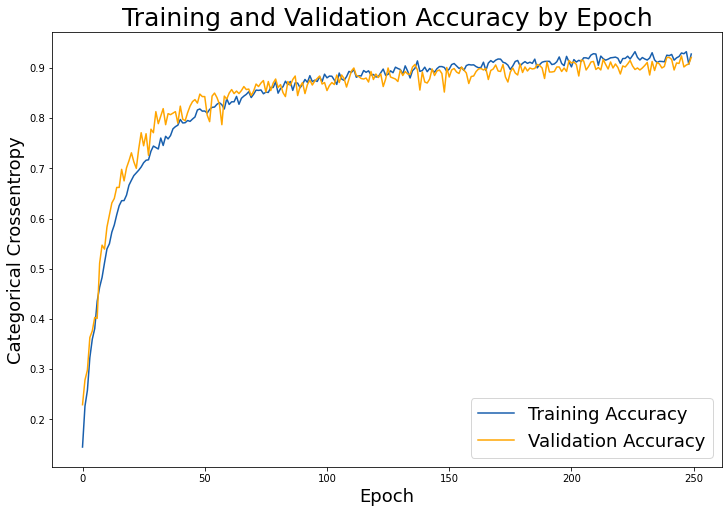

In [31]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18)
plt.show();

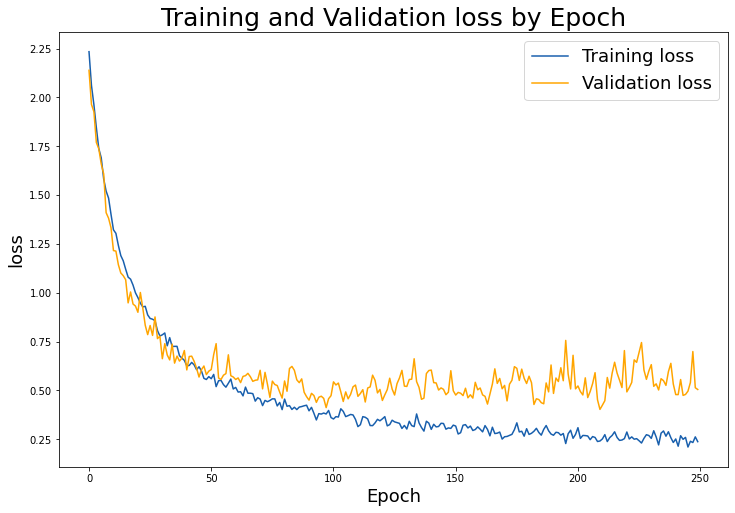

In [32]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training loss', color='#185fad')
plt.plot(val_loss, label='Validation loss', color='orange')

# Set title
plt.title('Training and Validation loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('loss', fontsize = 18)


plt.legend(fontsize = 18)
plt.show();

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0

In [34]:
test = data[4435:]

# Generating predictions on our never seen data with the model we built
preds = model.predict_generator(test_generator)

# Creating an empty list to store the values where the predictions are the maximum out 
# of all the 10 possible values
p = []
for i in range(0, len(preds)):
    p.append(np.where(preds[i] == max(preds[i])))

# Creating an empty list to store the values in a clean list
predictions = []
for i in range(0, len(preds)):
    predictions.append(p[i][0][0])
    
# Adding those predictions to our test dataframe
test['predictions'] = predictions

# Changing the numeric values to their corresponding labels
test['predictions'] = test['predictions'].map({8:'siren', 9:'street_music', 7:'jackhammer',
                   4:'drilling', 3:'dog_bark', 2:'children_playing',
                   6:'gun_shot', 5:'engine_idling', 0:'air_conditioner',
                   1:'car_horn'})

# Checking the percentage of correct predictions 
round(len(test[test['Class'] == test['predictions']])/len(test),2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

0.9

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


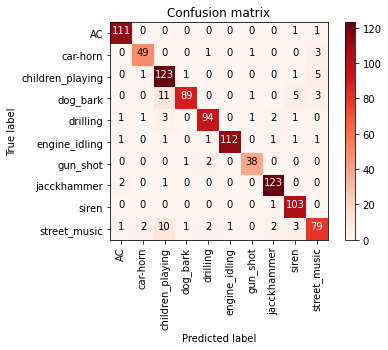

In [44]:
Y_pred = model.predict_generator(val_generator, len(test) // 32+1)
y_pred = np.argmax(Y_pred, axis=1)
classname=['AC','car-horn','children_playing','dog_bark','drilling','engine_idling','gun_shot','jacckhammer','siren','street_music']
cm=confusion_matrix(val_generator.classes, y_pred)
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
      for j in range (cm.shape[1]):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")


    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(cm,classes=classname)
plt.show()

In [55]:
print('Classification Report')
print(classification_report(test['Class'],test['predictions']))

Classification Report
                  precision    recall  f1-score   support

 air_conditioner       0.90      0.96      0.93        99
        car_horn       0.94      0.87      0.90        68
children_playing       0.69      0.93      0.79       102
        dog_bark       0.98      0.68      0.80       120
        drilling       0.93      0.93      0.93       122
   engine_idling       0.99      0.98      0.99       121
        gun_shot       0.86      1.00      0.92        37
      jackhammer       0.91      0.96      0.93       112
           siren       0.91      0.97      0.94       113
    street_music       0.89      0.74      0.80       106

        accuracy                           0.90      1000
       macro avg       0.90      0.90      0.89      1000
    weighted avg       0.91      0.90      0.89      1000

